In [5]:
#find best learning_rate

import numpy as np
import random
import matplotlib.pyplot as plt
from matplotlib.pyplot import plot,savefig

def inference(w, b, x):        # inference, test, predict, same thing. Run model after training
    pred_y = w * x + b
    return pred_y

def eval_loss(w, b, x_list, gt_y_list):
    avg_loss = 0.0
    avg_loss = 0.5*np.sum((w*x_list + b - gt_y_list)**2) # loss function
    avg_loss /= len(gt_y_list)
    return avg_loss

def gradient(pred_y, gt_y, x):
    diff = pred_y - gt_y
    dw = diff * x
    db = diff
    return dw, db

def cal_step_gradient(batch_x_list, batch_gt_y_list, w, b, lr):
    avg_dw, avg_db = 0, 0
    batch_size = len(batch_x_list)
    #print(bat)
    pred_y = inference(w,b,batch_x_list)    #get label data
    dw,db = gradient(pred_y,batch_gt_y_list,batch_x_list)
    avg_dw = np.sum(dw) / batch_size
    avg_db = np.sum(db) / batch_size
    w -= lr * avg_dw
    b -= lr * avg_db
    return w,b
    

def train(x_list, gt_y_list, batch_size, lr, max_iter):
    w = 0
    b = 0
    num_samples = len(x_list)
    loss = [eval_loss(w, b, x_list, gt_y_list)]
    for i in range(max_iter):
        batch_idxs = np.random.choice(len(x_list), batch_size)
        batch_x = np.array([x_list[j] for j in batch_idxs])
        batch_y = np.array([gt_y_list[j] for j in batch_idxs])
        w, b = cal_step_gradient(batch_x, batch_y, w, b, lr)
        loss.append(eval_loss(w, b, x_list, gt_y_list))
        
    return loss
        
def find_best_loss():
    max_iter = 200
    loss_all = []
    lr_list = [0.0001,0.001,0.01,0.3,0.1,1,1.3]
    for i in range(len(lr_list)):
        loss = run(lr_list[i])
        loss_all.append(loss)
    
    x = np.array(range(0,max_iter+1))  #numpy.linspace(开始，终值(含终值))，个数)
    loss_all = np.array(loss_all)
    print(x.shape)
    print(loss_all.shape)
    #开始画图
    plt.title('Result Analysis')   #标题
    plot(x, np.array(loss_all[0]), color='green', label='lr_0.0001')
    plot(x, np.array(loss_all[1]), color='red', label='lr_0.001')
    plot(x, np.array(loss_all[2]), color='skyblue', label='lr_0.01')
    plot(x, np.array(loss_all[3]), color='black', label='lr_0.3')
    plot(x, np.array(loss_all[4]), color='gray', label='lr_0.1')
    plot(x, np.array(loss_all[5]), color='yellow', label='lr_1')
    plot(x, np.array(loss_all[6]), color='pink', label='lr_1.3')
    plt.legend() # 显示图例

    plt.xlabel('iteration times')
    plt.ylabel('loss')
    plt.show()
    #python 一个折线图绘制多个曲线
           
#load data from file导入txt数据
def load_data(filename):
    dataset = []
    label = []
    file = open(filename)
    for line in file.readlines():
        lineArr = line.strip().split('\t')
        dataset.append(lineArr[:2])
        label.append(lineArr[-1])
    return np.array(dataset,dtype=np.float64),np.array(label,dtype=np.float64).reshape(-1,1)

#reshape(-1,1)表示只固定列为1列,行不知道,自动确定 同理,.reshape(2,-1)表示只确定行,列系统自动确定。


def gen_sample_data():
    w = random.randint(0, 10) + random.random()		# for noise random.random[0, 1)
    b = random.randint(0, 5) + random.random()
    num_samples = 100
    x_list = []
    y_list = []
    for i in range(num_samples):
        x = random.randint(0, 100) * random.random()
        y = w * x + b + random.random() * random.randint(-1, 1)
        x_list.append(x)
        y_list.append(y)
    return np.array(x_list), np.array(y_list), w, b

def run(lr):
    #x_list, y_list, w, b = gen_sample_data() #由于迭代后要调整学习率与将上次迭代的w,b重新赋值，因此没用采用每次随机生成数据的gen_dample_data
    x_list,y_list = load_data('data.txt')
    lr = lr
    max_iter = 200
    batch_size = 50
    loss = train(x_list, y_list, batch_size, lr, max_iter)
    return loss

(201,)
(7, 201)


/home/bbying/anaconda3/envs/opencv36/lib/python3.6/site-packages/ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  


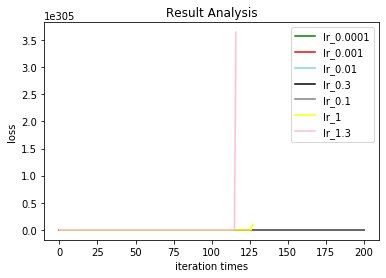

In [6]:
if __name__ == '__main__':	# 跑.py的时候，跑main下面的；被导入当模块时，main下面不跑，其他当函数调
    find_best_loss()